# Problem Statement
### Context
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

### Content
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):

##### CRIM: per capita crime rate by town
##### ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
##### INDUS: proportion of non-retail business acres per town
##### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
##### NOX: nitric oxides concentration (parts per 10 million)
##### RM: average number of rooms per dwelling
##### AGE: proportion of owner-occupied units built prior to 1940
##### DIS: weighted distances to ﬁve Boston employment centers
##### RAD: index of accessibility to radial highways
##### TAX: full-value property-tax rate per USD 10,000
##### PTRATIO: pupil-teacher ratio by town
##### B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
##### LSTAT: % lower status of the population
##### MEDV: Median value of owner-occupied homes in USD 1000s #### We can see that the input attributes have a mixture of units.
### To do:
Predict the monetary value of a house

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
boston = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\boston-housing-dataset\HousingData.csv')
print(boston.shape)
boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df = pd.DataFrame(boston)
df.shape

(506, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.apply(lambda df:len(df.unique()))

CRIM       485
ZN          27
INDUS       77
CHAS         3
NOX         81
RM         446
AGE        349
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      439
MEDV       229
dtype: int64

In [7]:
df['CHAS'].value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

We see some difference for unique values in 'CHAS'variable because of the missing values present 

In [8]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
df['CRIM'].fillna(df['CRIM'].median(), inplace = True)
df['ZN'].fillna(df['ZN'].median(), inplace = True)
df['INDUS'].fillna(df['INDUS'].median(), inplace = True)
df['CHAS'].fillna(df['CHAS'].median(), inplace = True)
df['AGE'].fillna(df['AGE'].median(), inplace = True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace = True)

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df['CHAS'].value_counts()

0.0    472
1.0     34
Name: CHAS, dtype: int64

In [14]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508,-0.476394
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


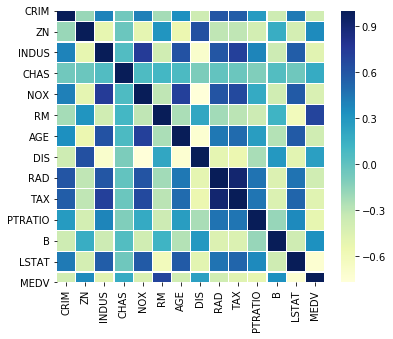

In [15]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [16]:
X1 = pd.DataFrame(df)
X1.drop(['CHAS'],axis=1 ,inplace=True)
Y1 = pd.DataFrame(df)
Y1.drop(['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'],axis=1, inplace=True)

In [17]:
print('X1 shape: ',X1.shape)
print('Y1 shape: ',Y1.shape)

X1 shape:  (506, 13)
Y1 shape:  (506, 1)


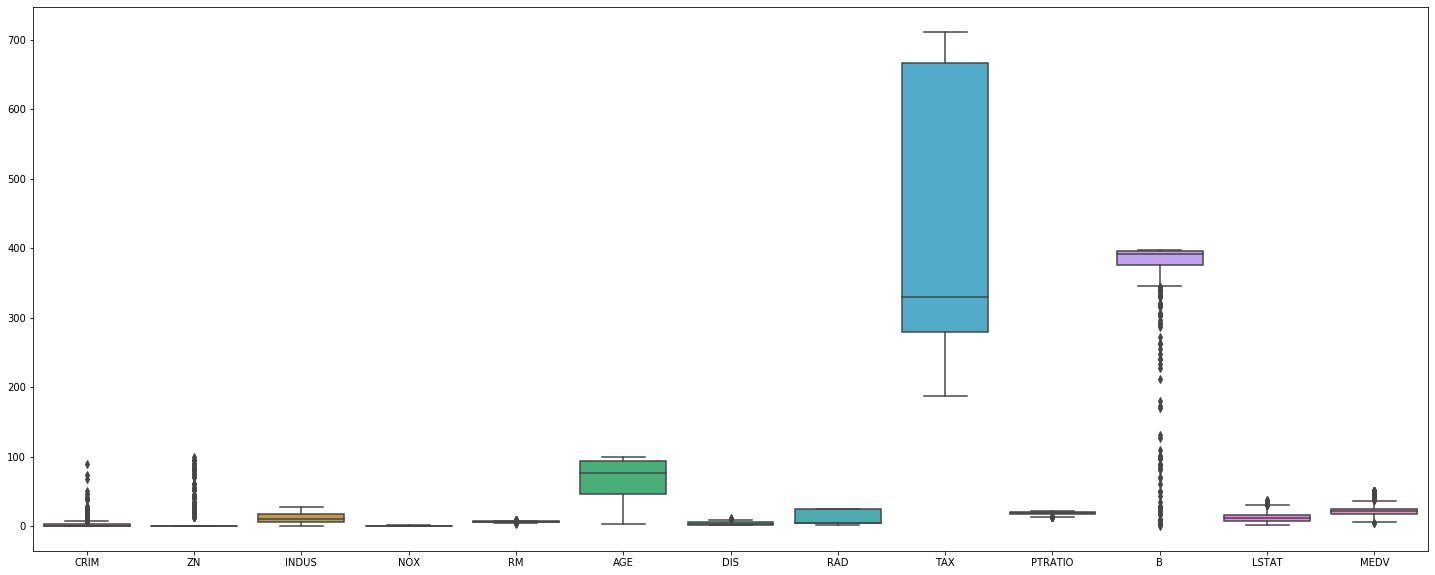

In [18]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=X1.iloc[:,: ]);

In [19]:
# Outlier identification using Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X1))
print(z)

[[0.40559156 0.31436884 1.30170603 ... 0.44105193 1.09619345 0.15968566]
 [0.40314013 0.46815955 0.59105154 ... 0.44105193 0.50277932 0.10152429]
 [0.40314247 0.46815955 0.59105154 ... 0.39642699 1.23170869 1.32424667]
 ...
 [0.3992335  0.46815955 0.13453268 ... 0.44105193 1.00204601 0.14880191]
 [0.39353063 0.46815955 0.13453268 ... 0.4032249  0.88222201 0.0579893 ]
 [0.40079265 0.46815955 0.13453268 ... 0.44105193 0.68251533 1.15724782]]


It is difficult to interpret the above output, therefore we can try by defining the threshold to identify an outlier, the below code gives us output in an array format which is easily readable

In [20]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57,  65,  66, 102, 141, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 225, 254, 255, 256, 257, 262, 283, 284, 286,
       290, 291, 292, 347, 348, 351, 352, 353, 353, 354, 354, 355, 364,
       365, 367, 373, 374, 374, 380, 398, 404, 405, 406, 410, 410, 411,
       412, 412, 414, 414, 415, 416, 418, 418, 419, 423, 424, 425, 426,
       427, 427, 429, 431, 436, 437, 438, 438, 445, 450, 454, 455, 456,
       457, 466], dtype=int64), array([ 1,  1,  1,  1,  1, 10, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  1,  1,  1,  4,  4,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,  1,
        6,  1,  6,  6,  4,  4,  4, 11,  4, 11,  0,  0,  0,  0,  4,  0, 10,
       10, 10, 11,  0, 11, 10, 10,  0, 10, 10, 10, 10, 10, 10,  0, 10, 10,
       10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10], dtype=int64))


 The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [21]:
# Outlier identification using IQR Score
Q1 = X1.quantile(0.25)
Q3 = X1.quantile(0.75)
IQR = Q3 - Q1
low = Q1-1.5*IQR
high = Q3+1.5*IQR
print(IQR)

CRIM         2.725485
ZN           0.000000
INDUS       12.910000
NOX          0.175000
RM           0.738000
AGE         47.650000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT        9.340000
MEDV         7.975000
dtype: float64


In [22]:
# Count of outliers
((X1 < (Q1 - 1.5 * IQR)) | (X1 > (Q3 + 1.5 * IQR))).sum()

CRIM        81
ZN         126
INDUS        0
NOX          0
RM          30
AGE          0
DIS          5
RAD          0
TAX          0
PTRATIO     15
B           77
LSTAT       12
MEDV        40
dtype: int64

In [23]:
print(X1.quantile(0.95)) 
print()
print(X1.quantile(0.50))

CRIM        15.78915
ZN          80.00000
INDUS       19.58000
NOX          0.74000
RM           7.58750
AGE        100.00000
DIS          7.82780
RAD         24.00000
TAX        666.00000
PTRATIO     21.00000
B          396.90000
LSTAT       26.80750
MEDV        43.40000
Name: 0.95, dtype: float64

CRIM         0.253715
ZN           0.000000
INDUS        9.690000
NOX          0.538000
RM           6.208500
AGE         76.800000
DIS          3.207450
RAD          5.000000
TAX        330.000000
PTRATIO     19.050000
B          391.440000
LSTAT       11.430000
MEDV        21.200000
Name: 0.5, dtype: float64


In [24]:
X1['CRIM'] = np.where(X1['CRIM'] > 15.80, 0.25, X1['CRIM'])
X1['ZN'] = np.where(X1['ZN'] > 80.00,0.00, X1['ZN'])
X1['RM'] = np.where(X1['RM'] > 7.60,6.20 , X1['RM'])
X1['DIS'] = np.where(X1['DIS'] > 7.80,3.20 , X1['DIS'])
X1['PTRATIO'] = np.where(X1['PTRATIO'] > 21.00,19.05, X1['PTRATIO'])
X1['B'] = np.where(X1['B'] > 396.90,391.40 , X1['B'])
X1['LSTAT'] = np.where(X1['LSTAT'] > 26.80,11.40, X1['LSTAT'])
X1['MEDV'] = np.where(X1['MEDV'] > 43.40,21.20, X1['MEDV'])

In [25]:
((X1 < (Q1 - 1.5 * IQR)) | (X1 > (Q3 + 1.5 * IQR))).sum()

CRIM        55
ZN         112
INDUS        0
NOX          0
RM           8
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO     15
B           77
LSTAT        0
MEDV        14
dtype: int64

We see that the number of outliers have reduced from 386 to 281

In [26]:
# Eliminiating the ouliers using Z-Score method
# df = df[(z < 3).all(axis=1)]

The above code will reomove all the outliers based on the Z-Score that we got

In [27]:
print(X1.shape)
print(Y1.shape)

(506, 13)
(506, 1)


## Using PCA (Principle Component Analysis) for Feature selection and Dimension reduction

In [28]:
from sklearn.preprocessing import StandardScaler
x = X1.loc[:, :].values
y = Y1.loc[:,:].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

It is important to first scale the data and then use PCA to it

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3', '4', '5' , '6' , '7' , '8' ])

In [30]:
principalDf

,1,2,3,4,5,6,7,8
0,-2.399099,0.014802,1.091349,0.534032,-0.107940,0.067679,-0.198636,0.192040
1,-1.628015,-0.766638,0.093388,-0.335260,0.625765,-0.310379,-0.442999,-0.078150
2,-2.868631,0.623725,1.143439,-1.342023,0.944683,0.123529,-0.105009,-0.174609
3,-3.358008,0.686618,0.188303,-1.445775,0.972683,0.426713,-0.319959,0.016780
4,-2.997204,0.581307,0.232469,-1.358398,1.313925,-0.647457,-0.746713,0.049362
...,...,...,...,...,...,...,...,...
501,-0.367455,-0.747266,0.218128,-1.162853,0.685101,-0.601522,0.779173,0.101252
502,-0.161599,-1.237364,0.064340,-0.975884,0.294770,-0.131263,0.929129,0.443037
503,-0.572740,-0.381248,1.084921,-1.646117,0.735279,-0.610772,1.204465,0.226213
504,-0.437710,-0.585983,0.774352,-1.430623,0.679849,-0.552884,1.083112,0.202807


In [31]:
df_rev = pd.concat([principalDf, Y1[['CHAS']]], axis = 1)
df_rev

,1,2,3,4,5,6,7,8,CHAS
0,-2.399099,0.014802,1.091349,0.534032,-0.107940,0.067679,-0.198636,0.192040,0.0
1,-1.628015,-0.766638,0.093388,-0.335260,0.625765,-0.310379,-0.442999,-0.078150,0.0
2,-2.868631,0.623725,1.143439,-1.342023,0.944683,0.123529,-0.105009,-0.174609,0.0
3,-3.358008,0.686618,0.188303,-1.445775,0.972683,0.426713,-0.319959,0.016780,0.0
4,-2.997204,0.581307,0.232469,-1.358398,1.313925,-0.647457,-0.746713,0.049362,0.0
...,...,...,...,...,...,...,...,...,...
501,-0.367455,-0.747266,0.218128,-1.162853,0.685101,-0.601522,0.779173,0.101252,0.0
502,-0.161599,-1.237364,0.064340,-0.975884,0.294770,-0.131263,0.929129,0.443037,0.0
503,-0.572740,-0.381248,1.084921,-1.646117,0.735279,-0.610772,1.204465,0.226213,0.0
504,-0.437710,-0.585983,0.774352,-1.430623,0.679849,-0.552884,1.083112,0.202807,0.0


In [32]:
df_rev.isnull().sum()

1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
CHAS    0
dtype: int64

In [33]:
df_rev['CHAS'].value_counts()

0.0    472
1.0     34
Name: CHAS, dtype: int64

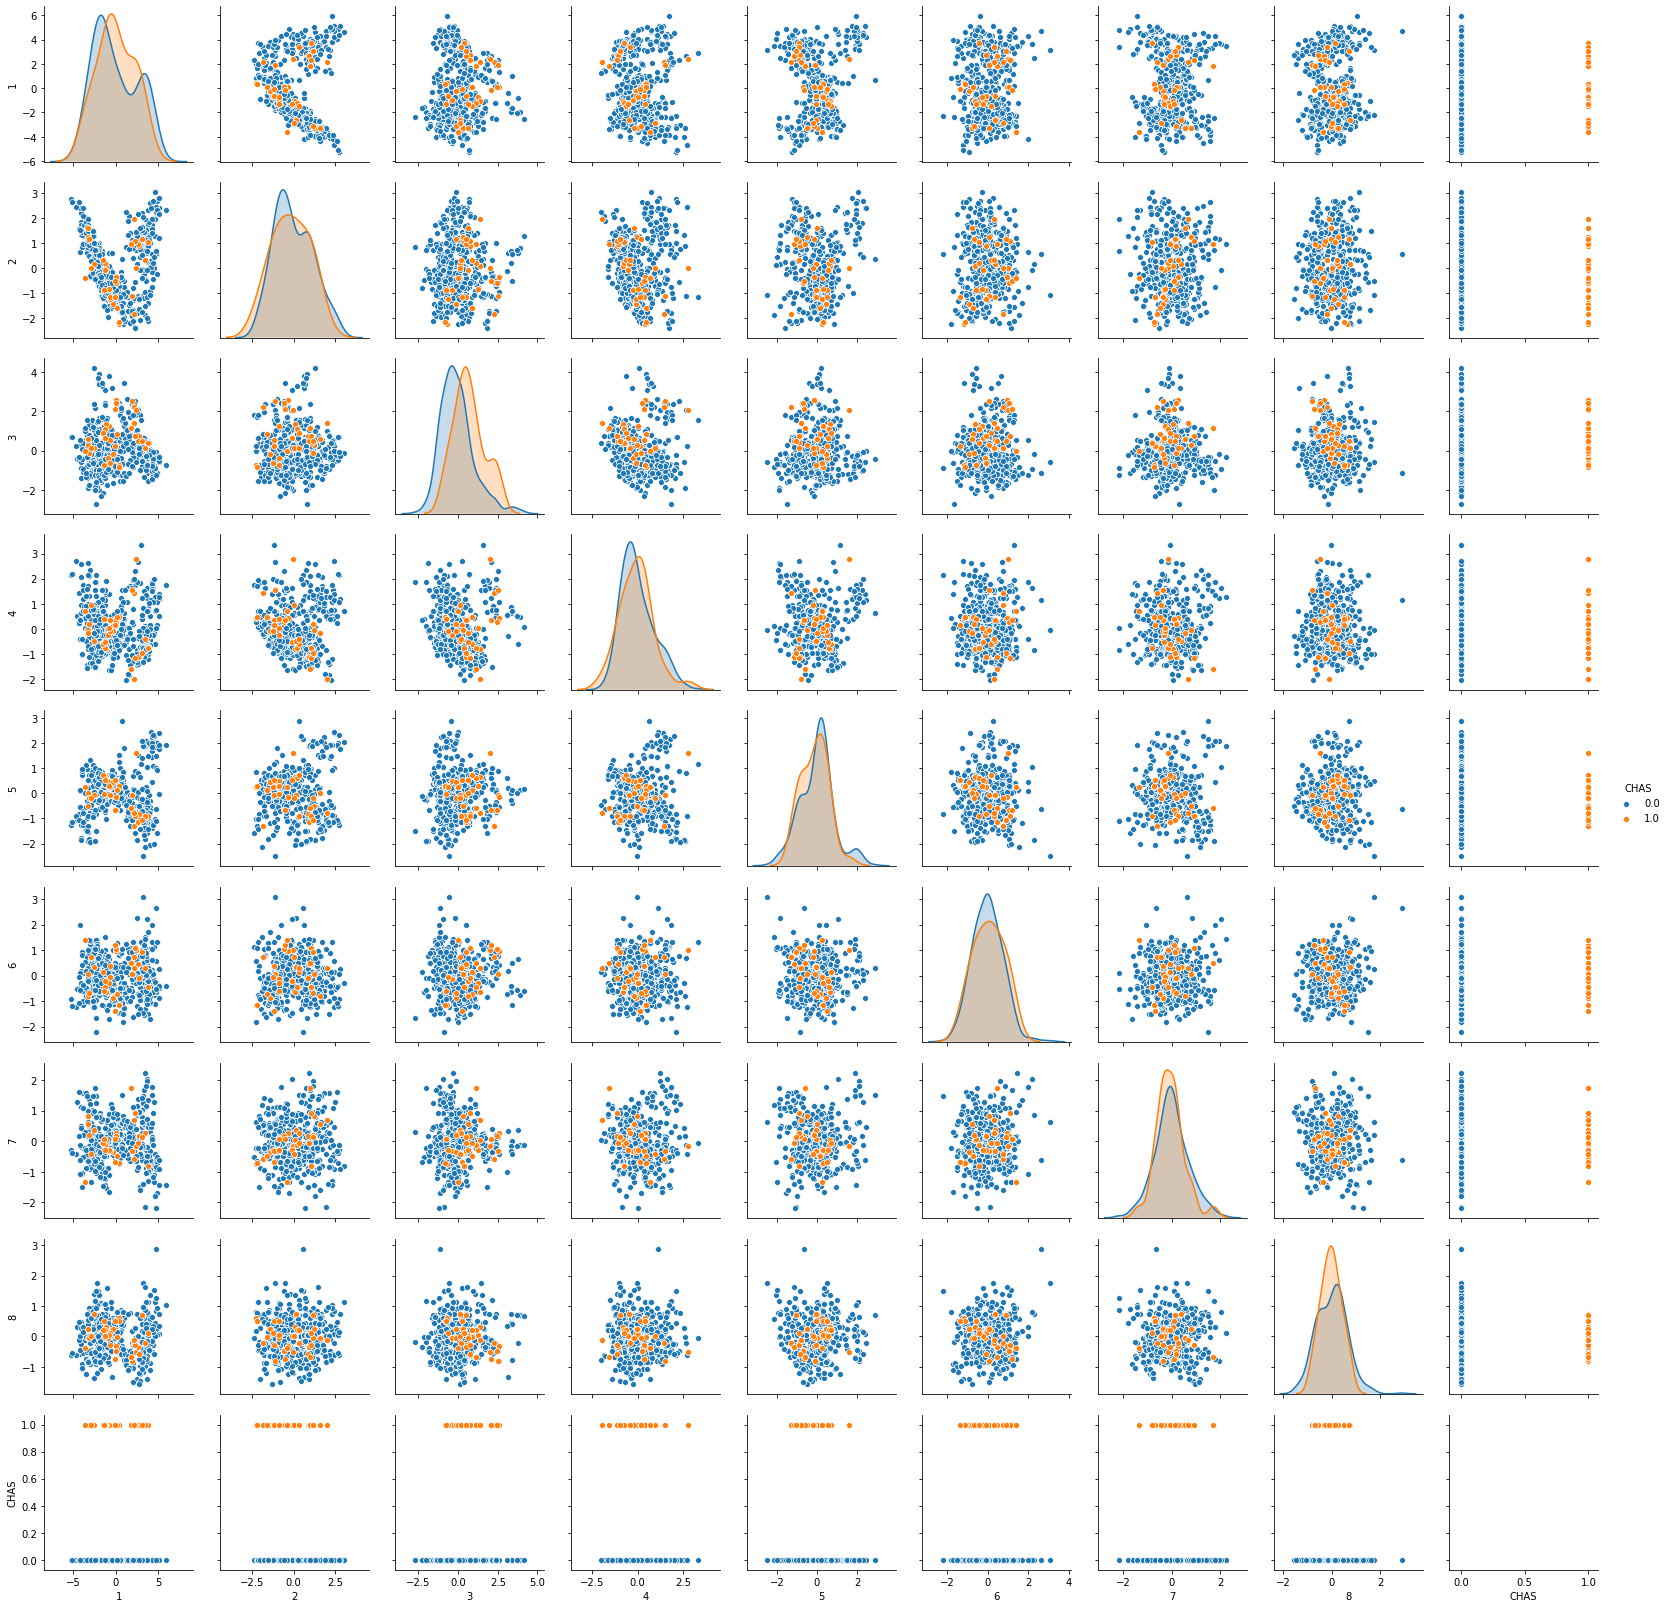

In [34]:
sns.pairplot(df_rev, hue='CHAS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013FB6473F08>,
      dtype=object)

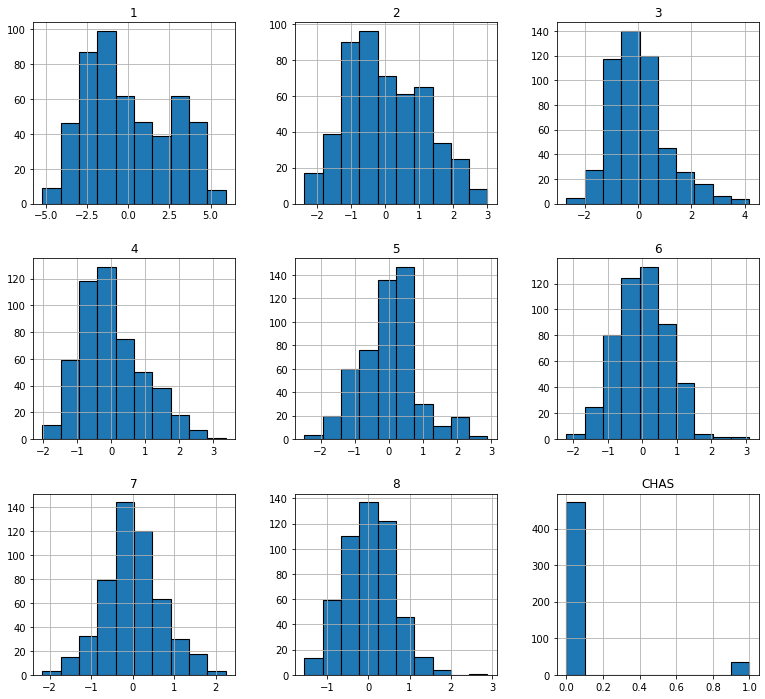

In [35]:
df_rev.hist(edgecolor='black', linewidth=1.1, figsize=(13,12))

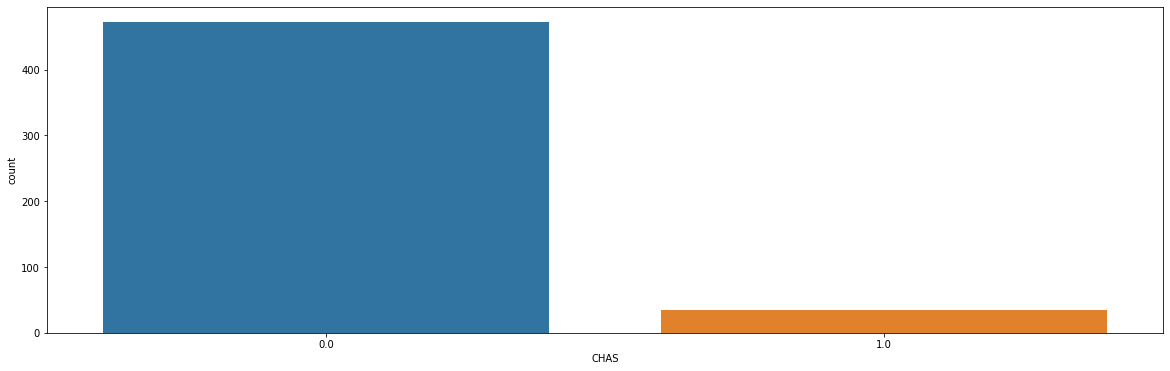

In [36]:
plt.figure(figsize=(20, 6))
sns.countplot(x='CHAS', data=df_rev)

In [37]:
X = df_rev.values[:,:-1]
Y = df_rev.values[:,-1]
Y = Y.astype(int)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

### Base Models:

# Logistic Regression

In [39]:
#Building the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression() # creating the model object
#Fitting the training data in the model
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[ 0.08612011 -0.2666932   0.60410097 -0.38339814  0.03986721  0.22810786
  -0.20783316 -0.1497054 ]]
[-2.92995558]


In [40]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[138   0]
 [ 14   0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       138
           1       0.00      0.00      0.00        14

    accuracy                           0.91       152
   macro avg       0.45      0.50      0.48       152
weighted avg       0.82      0.91      0.86       152

Accuracy of the model: 0.9078947368421053


# Naive Bayes

In [41]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred_NB= classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred_NB))
print(confusion_matrix(Y_test, Y_pred_NB))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred_NB,Y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       138
           1       0.00      0.00      0.00        14

    accuracy                           0.91       152
   macro avg       0.45      0.50      0.48       152
weighted avg       0.82      0.91      0.86       152

[[138   0]
 [ 14   0]]
accuracy is 0.9078947368421053


# Decision Tree

In [42]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, Y_train)

y_pred_DT = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_DT))
print(confusion_matrix(Y_test, y_pred_DT))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_DT,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       138
           1       0.29      0.14      0.19        14

    accuracy                           0.89       152
   macro avg       0.60      0.55      0.57       152
weighted avg       0.86      0.89      0.87       152

[[133   5]
 [ 12   2]]
accuracy is 0.8881578947368421


### Tuning Model

# Dimension reduction using PCA

In [43]:
X2 = pd.DataFrame(X1)
Y2 = pd.DataFrame(Y1)

In [44]:
from sklearn.preprocessing import StandardScaler
x = X2.loc[:, :].values
y = Y2.loc[:,:].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2' ])

In [46]:
df_rev1 = pd.concat([principalDf, Y1[['CHAS']]], axis = 1)
df_rev1

,PC 1,PC 2,CHAS
0,-2.399099,0.014807,0.0
1,-1.628015,-0.766639,0.0
2,-2.868631,0.623726,0.0
3,-3.358008,0.686619,0.0
4,-2.997204,0.581308,0.0
...,...,...,...
501,-0.367455,-0.747265,0.0
502,-0.161599,-1.237362,0.0
503,-0.572740,-0.381246,0.0
504,-0.437710,-0.585981,0.0


In [47]:
X = df_rev1.values[:,:-1]
Y = df_rev1.values[:,-1]
Y = Y.astype(int)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

# Logistic Regression

In [49]:
#Building the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression() # creating the model object
#Fitting the training data in the model
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[ 0.04482535 -0.18176759]]
[-2.71026334]


In [50]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[138   0]
 [ 14   0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       138
           1       0.00      0.00      0.00        14

    accuracy                           0.91       152
   macro avg       0.45      0.50      0.48       152
weighted avg       0.82      0.91      0.86       152

Accuracy of the model: 0.9078947368421053


# Naive Bayes

In [51]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred_NB= classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred_NB))
print(confusion_matrix(Y_test, Y_pred_NB))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred_NB,Y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       138
           1       0.00      0.00      0.00        14

    accuracy                           0.91       152
   macro avg       0.45      0.50      0.48       152
weighted avg       0.82      0.91      0.86       152

[[138   0]
 [ 14   0]]
accuracy is 0.9078947368421053


# Decision Tree

In [52]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, Y_train)

y_pred_DT = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_DT))
print(confusion_matrix(Y_test, y_pred_DT))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_DT,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       138
           1       0.10      0.07      0.08        14

    accuracy                           0.86       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.83      0.86      0.84       152

[[129   9]
 [ 13   1]]
accuracy is 0.8552631578947368


## Tuning model using Threshold adjustment

In [53]:
#Store the predicted probbilities
Y_pred_prob = classifier.predict_proba(X_test)
print(Y_pred_prob)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [54]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
       cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.01 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.02 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.03 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.04 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.05 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.06 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.07 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.08 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.09 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.1 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.11 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.12 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.13 : 22  , type 2 error : 13  , type 1 error: 9
Errors a

In [55]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.50:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
print(Y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[129   9]
 [ 13   1]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       138
           1       0.10      0.07      0.08        14

    accuracy                           0.86       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.83      0.86      0.84       152

Accuracy of the model: 0.8552631578947368


0.5
[0. 1.]
[0. 1.]


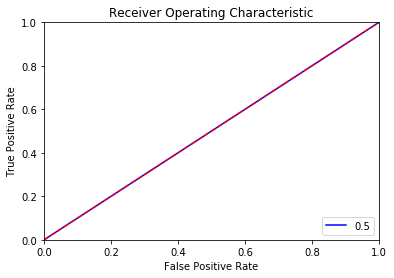

In [57]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Tuning the model using cross validation

In [58]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=2)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=2, random_state=None, shuffle=False)
[0.95480226 0.93220339]
0.943502824858757


In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_1)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,Y_pred_1))

acc = accuracy_score(Y_test,Y_pred_1)
print("Accuracy of the model : ",acc)

[[138   0]
 [ 14   0]]
Classification report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       138
           1       0.00      0.00      0.00        14

    accuracy                           0.91       152
   macro avg       0.45      0.50      0.48       152
weighted avg       0.82      0.91      0.86       152

Accuracy of the model :  0.9078947368421053


### Tuning the data when PCA is 8

In [60]:
from sklearn.preprocessing import StandardScaler
x = X1.loc[:, :].values
y = Y1.loc[:,:].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3', '4', '5' , '6' , '7' , '8' ])

In [62]:
t_df_rev = pd.concat([principalDf, Y1[['CHAS']]], axis = 1)
t_df_rev

,1,2,3,4,5,6,7,8,CHAS
0,-2.399099,0.014802,1.091349,0.534032,-0.107940,0.067679,-0.198636,0.192040,0.0
1,-1.628015,-0.766638,0.093388,-0.335260,0.625765,-0.310379,-0.442999,-0.078150,0.0
2,-2.868631,0.623725,1.143439,-1.342023,0.944683,0.123529,-0.105009,-0.174609,0.0
3,-3.358008,0.686618,0.188303,-1.445775,0.972683,0.426713,-0.319959,0.016780,0.0
4,-2.997204,0.581307,0.232469,-1.358398,1.313925,-0.647457,-0.746713,0.049362,0.0
...,...,...,...,...,...,...,...,...,...
501,-0.367455,-0.747266,0.218128,-1.162853,0.685101,-0.601522,0.779173,0.101252,0.0
502,-0.161599,-1.237364,0.064340,-0.975884,0.294770,-0.131263,0.929129,0.443037,0.0
503,-0.572740,-0.381248,1.084921,-1.646117,0.735279,-0.610772,1.204465,0.226213,0.0
504,-0.437710,-0.585983,0.774352,-1.430623,0.679849,-0.552884,1.083112,0.202807,0.0


In [63]:
X = t_df_rev.values[:,:-1]
Y = t_df_rev.values[:,-1]
Y = Y.astype(int)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

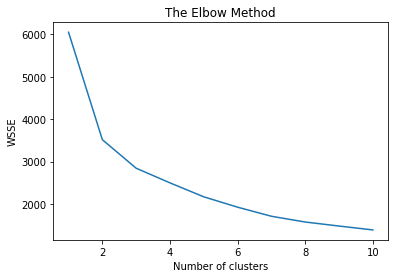

In [67]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wsse = [] #within the clusters some of squared errors & inertia calculates those errors
for i in range(1, 11): #11 is excluding
    kmeans = KMeans(n_clusters = i, random_state = 10) #random_state is equivalent to set.seed, but number should be same so that models are matched
    kmeans.fit(X)
    wsse.append(kmeans.inertia_) # append helps to add a single element at a time
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [68]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=3)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=3, random_state=None, shuffle=False)
[0.94067797 0.96610169 0.92372881]
0.943502824858757


In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_1)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,Y_pred_1))

acc = accuracy_score(Y_test,Y_pred_1)
print("Accuracy of the model : ",acc)

[[138   0]
 [ 14   0]]
Classification report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       138
           1       0.00      0.00      0.00        14

    accuracy                           0.91       152
   macro avg       0.45      0.50      0.48       152
weighted avg       0.82      0.91      0.86       152

Accuracy of the model :  0.9078947368421053


In [73]:
X = X1
Y = Y1

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
print(X_test)

[[-0.5481489   1.37658446 -0.25532556 ...  0.41740766 -0.54795344
   1.11507439]
 [-0.55736215  2.84936984 -1.24894793 ...  0.41751252 -1.22902111
   1.50878293]
 [-0.5534524   3.94032197 -1.18427429 ...  0.45452824 -1.29188889
   0.40056631]
 ...
 [-0.52765415 -0.42348655 -0.42141924 ...  0.43712142  0.0353199
  -0.1389602 ]
 [-0.53468444  1.21294164 -0.95497681 ...  0.20129041 -0.14804447
   0.21100294]
 [-0.49946024 -0.42348655 -0.42141924 ... -2.96496891 -0.25107778
  -0.31394177]]


In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_varaince = pca.explained_variance_ratio_
print(explained_varaince)

[0.50276366 0.10317446 0.08760777 0.06586225 0.05715089 0.04245775
 0.03565792 0.02830265 0.02157543 0.01980515 0.01700233 0.0134571
 0.00518263]


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # if the components are 1 or more than 1 it will tell the no. if less it tells hows
#much varaince should be retained. In this case, it will select min no. of components that will give that variance.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_varaince = pca.explained_variance_ratio_
print(explained_varaince)

[0.50276366 0.10317446]


In [81]:
#Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",gamma=0.1,C=1)
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[94  0]
 [ 8  0]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        94
         1.0       0.00      0.00      0.00         8

    accuracy                           0.92       102
   macro avg       0.46      0.50      0.48       102
weighted avg       0.85      0.92      0.88       102

Accuracy of the model: 0.9215686274509803


## Conclusion:
### Base Model:
##### Logistic Regression - 90.78%
##### Naive Bayes - 90.78%
##### Decision Tree - 88.81%

### Tuned Model when PCA was reduced to 2:
##### Logistic Regression - 90.78%
##### Naive Bayes - 90.78%
##### Decision Tree - 83.55%

### Tuned Model using Threshold Adjustment and Cross-Validation
##### Threshold ajustment - 85.52%
##### Cross-Validation - 90.78%

### PCA = 2 then using SVC
##### SVC - 92.15%